# 1 - We have 2 datasets, one from the Department of Education, Training and Employment - DETE, and another from the Technical and Further Education Institute - TAFE.

* We wish to analyze these 2 datasets for insight into the reasons why employees are resigning. We have 2 questions we wish to answer:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have worked there longer?

* Are younger employees resigning due to some kind of dissatisfaction, what about older employees?

In [1]:
import numpy as np
import pandas as pd

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

# Inspecting the DETE Dataset

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

* The Majority of the data is made of of strings with some of the data being made up of boolean values.

* Boolean data values are answers to questions about the factors influencing an employee to leave.

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

* We can see that a number of columns are missing values, with several columns being mostly empty.

# Inspecting some dete columns for their unique values:

In [5]:
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [6]:
dete_survey['Position'].value_counts()

Teacher                                                    324
Teacher Aide                                               137
Public Servant                                             126
Cleaner                                                     97
Head of Curriculum/Head of Special Education                38
Schools Officer                                             24
School Administrative Staff                                 16
Guidance Officer                                            12
Technical Officer                                           11
Professional Officer                                         7
Other                                                        7
School Based Professional Staff (Therapist, nurse, etc)      5
School Principal                                             5
Business Service Manager                                     4
Deputy Principal                                             4
Name: Position, dtype: int64

* After examining the data above- we can see that age retirment was the top reason for resignation

* Teachers and Teacher aides make up the bulk of people who resigned, followed closely by public servants.

# Inspecting the TAFE dataset:

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

* The Majority of the data is made up of string entries. We can also see a large number of missing data in the data set, which is possibly attributed to the style of the survey conducted.

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


* We can see that there are a large number of missing values, however, we can attribute that to the large number of columns representing questions from a questionaire. 

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

* Checking certain columns for unique values:


In [10]:
tafe_survey['Institute'].value_counts()

Brisbane North Institute of TAFE         161
Southern Queensland Institute of TAFE    142
Central Queensland Institute of TAFE     108
Sunshine Coast Institute of TAFE          91
Tropical North Institute of TAFE          70
SkillsTech Australia                      57
Southbank Institute of Technology         43
Barrier Reef Institute of TAFE            14
Mount Isa Institute of TAFE               12
Wide Bay Institute of TAFE                 2
Metropolitan South Institute of TAFE       1
The Bremer Institute of TAFE               1
Name: Institute, dtype: int64

* The majority of resignation surveys were conducted in Brisbane North Institute of TAFE, followed closely by the Souther Queensland Institute of TAFE.

# 2- Identifying Missing Values and Dropping Unneccessary Columns:

* Re-reading the dete_survey.csv file while making sure to set the 'Not Stated' values to Nan, so that we can have a more accurate picture of the missing values in our data.

In [11]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

* We re-read dete_csv file while making sure that all the cells with 'Not Stated' value are set to Nan, so that we may properly account of data that is missing.

* We droped columns 29 to 48 of the DETE dataset and columns 17 to 65 of the TAFE dataset because these columns are not needed for our analysis.

# 3- Clean Column Names:

*We will change some of the dete column names to better suite our purpose

In [12]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')
#Checking the new column names:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


* Next We will be update the TAFE survey column names:

In [13]:
tafe_survey_updated = (tafe_survey_updated.rename(columns={
    'Record_ID': 'id', 
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}))

* Confirming the changes made to the column name of dete_survey_updated and tafe_survey_updated.

In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


* We standardized column names accross both data frames. We selected the columns that we are going to use in our analysis and we standardized the column names accross both dataframes so that both data sets have identical names for the columns we are interested in.

* We decided to change the column names to lower case, remove trailing spaces and substitute middle space with underscores for the DETE data set, and then we applied the same column names to the equivalent columns of the TAFE dataset

# 4 Filtering the Data

* As we are interested in the reasons people quite their jobs, we will be looking for employees who's ***separationtype*** data column includes the word 'Resignation'

* We will check the number of unique entries in the ***separationtype*** column of both datasets

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

* We can see that for the DETE dataset, resignations form the 2nd, 3rd and 4th top reasons for leaving work, which when added together, cause resignation to be the top reason for leaving work.

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

* We can see that the same trend is present for the TAFE dataset, with resignation being the top way that employees are leaving their job.

* Selecting employees who specified some form of resignation as a ***separationtype***

In [18]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [19]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

* We selected from both DETE and TAFE datasets, the data on employees who have gavin resignation as the way/reason they left their jobs, and we assigned the resulting dataframes to new variables which we will use to further our analysis.

# 5 Verifying the Data:

* Below we will examine and verify the data in the date colomns of both DETE and TAFE datasets:

In [20]:
dete_resignations['cease_date'].value_counts()

# dete_resignations.loc[791:803, :]

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([2][0][0-1][0-9])', expand=True).astype(float)

dete_resignations['cease_date']

3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
12     2012.0
14     2012.0
16     2012.0
20     2012.0
21     2012.0
22     2012.0
23     2012.0
25     2012.0
27     2012.0
33     2012.0
34     2012.0
37     2012.0
39     2012.0
40     2012.0
41     2012.0
42     2012.0
43     2012.0
48     2012.0
50     2012.0
51     2012.0
55     2012.0
57     2012.0
61     2012.0
69     2012.0
71     2012.0
        ...  
747    2014.0
751    2013.0
752    2013.0
753    2013.0
755    2013.0
762    2006.0
766    2014.0
769    2013.0
770       NaN
771    2014.0
774       NaN
784    2013.0
786    2014.0
788       NaN
789    2014.0
790    2014.0
791       NaN
794    2013.0
797       NaN
798       NaN
802    2013.0
803    2014.0
804    2014.0
806    2013.0
807    2013.0
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64

* Next we check the unique values of cease_date and dete_start_date in the dete_resignations dataset.

In [22]:
print(dete_resignations['cease_date'].value_counts())
print('\n')
print(dete_resignations['dete_start_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64


* Now we check the cease_date in the TAFE dataset:

In [23]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

   cease_date
0      2010.0
1      2010.0
2      2010.0
3      2010.0
4      2010.0


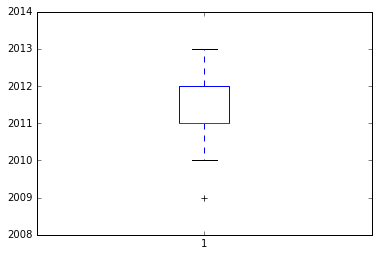

In [24]:
tafe_plot = tafe_resignations.loc[tafe_resignations['cease_date'].notnull(), 'cease_date']

tafe_plot = tafe_plot.reset_index()

tafe_plot = tafe_plot.drop('index', axis=1)

print(tafe_plot.head())

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

ax.boxplot(tafe_plot['cease_date'])
ax.set_ylim(2008, 2014)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')



   cease_date
0      2012.0
1      2012.0
2      2012.0
3      2012.0
4      2012.0


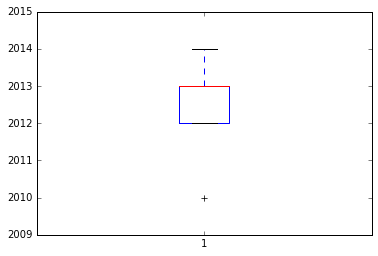

In [25]:
dete_plot = dete_resignations.loc[dete_resignations['cease_date'].notnull(), 'cease_date']

dete_plot = dete_plot.reset_index()

dete_plot = dete_plot.drop('index', axis = 1)

print(dete_plot.head())

fig, ax = plt.subplots()

ax.boxplot(dete_plot['cease_date'])
ax.set_ylim(2009, 2015)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')

# 6 Creating a new Column

* Below we will create a new 'institute_service' column in the dete_resignations dataset to match the column of the same name in the tafe_resignations dataset.

* First we will examine dete_resignations again to determine if it has the data we need to create this new column

In [26]:
print(dete_resignations.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


* We can see that there is a column called  'dete_start_date', which we can use to calculate the service of each individual.

* we will check to see if this column as well as the 'cease_date' column have any missing values:

In [27]:
print(dete_resignations['cease_date'].isnull().sum())
print(dete_resignations['dete_start_date'].isnull().sum())

11
28


* WE can see that the 'cease_date' column has 11 missing values while the 'dete_start_date' column has 28 missing values. 

* we will create a new column called 'institution_service' in the dete_resignations dataset amd we will also drop all rows with a missing value.

In [28]:
dete_resignations['institute_service'] =  dete_resignations['cease_date'] - dete_resignations['dete_start_date']

print(dete_resignations['institute_service'].isnull().sum())
print('\n')

print(dete_resignations['institute_service'].min())
print(dete_resignations['institute_service'].max())
print('\n')
print(dete_resignations['institute_service'])

38


0.0
49.0


3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64


* We can see that the new column in dete shows the calculated years of service for each eployee that was surveyed. The minimum years of service is 0, indicating that some employees resigned in the same year, while the maximum years of service of ran employee is a massive 49 years.

# 7 Identify Dissatisfied Employees:

* We will examine the dete_resignations and tafe_resignatios datasets one more time:


In [29]:
print(dete_resignations.columns)
print('\n')
print(tafe_resignations.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')


Index(['Record ID', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors

In [30]:
print(dete_resignations[['job_dissatisfaction', 
                         'dissatisfaction_with_the_department', 
                         'physical_work_environment',
                         'lack_of_recognition',
                         'lack_of_job_security', 
                         'work_location', 
                         'employment_conditions', 
                         'work_life_balance', 
                         'workload' ]].head())

    job_dissatisfaction  dissatisfaction_with_the_department  \
3                 False                                False   
5                 False                                False   
8                 False                                False   
9                  True                                 True   
11                False                                False   

    physical_work_environment  lack_of_recognition  lack_of_job_security  \
3                       False                False                 False   
5                       False                False                 False   
8                       False                False                 False   
9                       False                False                 False   
11                      False                False                 False   

    work_location  employment_conditions  work_life_balance  workload  
3           False                  False              False     False  
5           Fa

* We can see above that for the dete dataset - all relevant columns are already in boolean format, while it may be necessary to convert the values from string to boolean datatypes.

* We can also see that the index numbers are out of order.

In [31]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].unique())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

['-' 'Contributing Factors. Dissatisfaction ' nan]
-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


['-' 'Job Dissatisfaction' nan]
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


* We can see that for tafe_resignations, the data for the columns is indicated differently. Values are present where employees indicated dissatisfaction, otherwise there is only a a '-'. Nan is indicated where data is unavailable.

* We will need to convert these columns to boolean format.

* The index numbers are out of order on this dataset as well, owing to the fact that this dataset is a subset of our original dataset, containing only the employees who left work through resignation.

* Our next step is to reset the index for both datasets, and then we will need to change the representation of the tafe_resignation columns to boolean format.

In [32]:
#Resetting index - removing old index
dete_resignations = dete_resignations.reset_index().drop('index', axis=1).copy()
tafe_resignations = tafe_resignations.reset_index().drop('index', axis=1).copy()

* Creating a function to update the values in tafe_resignations:

In [33]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
    
tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

* Now that we have properly converted the relevant TAFE columns to boolean values, we can proceed to create a new column for both DETE and TAFE datasets.

* The new column will be called 'dissatisfied' and will simply reflect if the employee indicated any dissatisfaction with his/her job at the time of resignation.

In [34]:
#creating new column for the DETE dataset:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction', 
                         'dissatisfaction_with_the_department', 
                         'physical_work_environment',
                         'lack_of_recognition',
                         'lack_of_job_security', 
                         'work_location', 
                         'employment_conditions', 
                         'work_life_balance', 
                         'workload']].any(axis=1, skipna=False)

dete_resignations['dissatisfied']

0      False
1       True
2      False
3       True
4      False
5      False
6       True
7       True
8      False
9      False
10      True
11      True
12      True
13     False
14      True
15      True
16     False
17      True
18     False
19      True
20     False
21      True
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
281    False
282     True
283    False
284     True
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292     True
293     True
294    False
295    False
296     True
297     True
298    False
299    False
300    False
301    False
302    False
303    False
304    False
305     True
306    False
307    False
308    False
309     True
310    False
Name: dissatisfied, Length: 311, dtype: bool

In [35]:
#Creating new column for the TAFE dataset:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 
                   'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

tafe_resignations['dissatisfied']

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9       True
10     False
11       NaN
12      True
13       NaN
14     False
15      True
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
310    False
311    False
312     True
313    False
314    False
315    False
316      NaN
317     True
318     True
319    False
320    False
321    False
322    False
323    False
324    False
325    False
326    False
327     True
328    False
329    False
330     True
331    False
332    False
333    False
334    False
335    False
336    False
337    False
338    False
339    False
Name: dissatisfied, Length: 340, dtype: object

In [36]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

Changes made so far:
* 1- index was reset for both datasets - DETE and TAFE
* 2- TAFE columns indicating employee dissatisfaction were converted to boolean values.
* 3- a new column named 'dissatisfaction' was added to both datasets, indicating if an employee indicated any kind of dissatisfaction at the time of resignation.

# 8 Combining Our Data

* We will now combine our data from both datasets. But first we will add a column to both datasets which will help us identify from which dataset a row originally came from.

In [37]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

combined_updated = combined.dropna(thresh = 500, axis=1).copy()

* We added a new column called 'institute' to each data set which identifies if a specific row is in the TAFE or DETE datasets. All values belonging to this column in the DETE dataset were set to 'DETE' and all values belonging to this column in the TAFE dataset have been set to 'TAFE'.

* Both datasets were then combined, and columns containing less than 500 non null values were dropped. 

# 9 Clean the Service Column:

* Out next step is to clean the 'institution_service' column and then to categories the values for each entry:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [38]:
combined_updated['institute_service_up'] = (combined_updated['institute_service']
                                            .astype(str)
                                            .str.extract(r'(\d+)', expand=False).astype(float))

combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

* We have now obtained a clean list of service years for every surveyed employee.

* Next step is to categorize the values into one of 4:

In [39]:
def service_cat(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <=10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(service_cat)

print(combined_updated['service_cat'].value_counts())

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


* we can see from the results above that the majority of people who left worked under 3 years, followed closely by those who worked between 3 and 6 years.

# 10 Performing an Initial Analysis:

In [40]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

* We can see that the majority of poeple who resigned were not dissatisfied.

* We have only 8 missing values

* So we will fill the 8 missing values with the most commonly occuring value which is False.

In [41]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

* Next we calculate the percentage of dissatisfied people

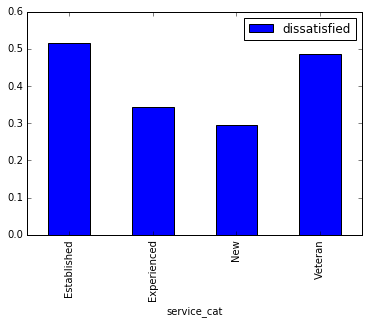

In [42]:
pct_ds = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
%matplotlib inline

pct_ds.plot(kind='bar')

* We can see that the dissatisfaction rate was the highest among Established employees, followed closely by veteran employees.

* New employees who resigned indicated the lowest percentage of dissatisfaction, followed next by experienced employees.